In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#数据集获取
diabetes=pd.read_csv('diabetes.csv')
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [9]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
#获取数据集维数
print("dimension of diabetes data:{}".format(diabetes.shape))

dimension of diabetes data:(768, 9)


In [13]:
#输出数据分类的统计 
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


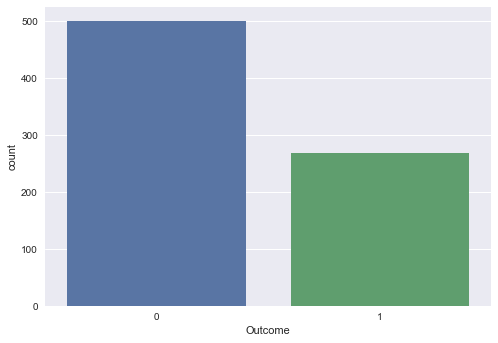

In [42]:
#Seaborn:以matplotlib为底层的作图库,是其补充
import seaborn as sns
sns.countplot(diabetes['Outcome'],label="Count")
sns.plt.savefig('outcome_count')
sns.plt.show()

In [16]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
##k-NN算法##

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(diabetes.loc[:,diabetes.columns!='Outcome'],diabetes['Outcome'],stratify=diabetes['Outcome'],random_state=66)

from sklearn.neighbors import KNeighborsClassifier

training_accuracy=[]
test_accuracy=[]
#range() 从1到10
neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
    #kNN建模
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    #训练集与测试集精确度存储
    training_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))

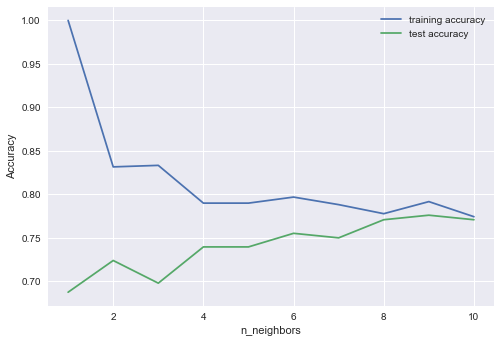

In [26]:
#作图比较训练集和测试集精确度关系
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')
plt.show()

In [29]:
#由图中得出近邻点个数为9时训练集与测试集精确度差别较接近且精确度较高→最合适
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

#输出精确度
print('Accuracy of K-NN classifier on training set:{:.3f}'.format(knn.score(X_train,y_train)))
print('Accuracy of K-NN classifier on test set:{:.3f}'.format(knn.score(X_test,y_test)))

Accuracy of K-NN classifier on training set:0.792
Accuracy of K-NN classifier on test set:0.776


In [30]:
##逻辑回归 LogisticRegression##

from sklearn.linear_model import LogisticRegression
#默认正则化参数默认C=1
logreg=LogisticRegression().fit(X_train,y_train)
print('Accuracy of LogisticRegression classifier on training set:{:.3f}'.format(logreg.score(X_train,y_train)))
print('Accuracy of LogisticRegression classifier on test set:{:.3f}'.format(logreg.score(X_test,y_test)))

Accuracy of LogisticRegression classifier on training set:0.781
Accuracy of LogisticRegression classifier on test set:0.771


In [35]:
#正则化参数调整/test C
logreg100=LogisticRegression(C=100).fit(X_train,y_train)
print('Accuracy of LogisticRegression classifier（C=100) on training set:{:.3f}'.format(logreg100.score(X_train,y_train)))
print('Accuracy of LogisticRegression classifier（C=100) on test set:{:.3f}'.format(logreg100.score(X_test,y_test)))

logreg_001=LogisticRegression(C=0.001).fit(X_train,y_train)

Accuracy of LogisticRegression classifier（C=100) on training set:0.785
Accuracy of LogisticRegression classifier（C=100) on test set:0.766


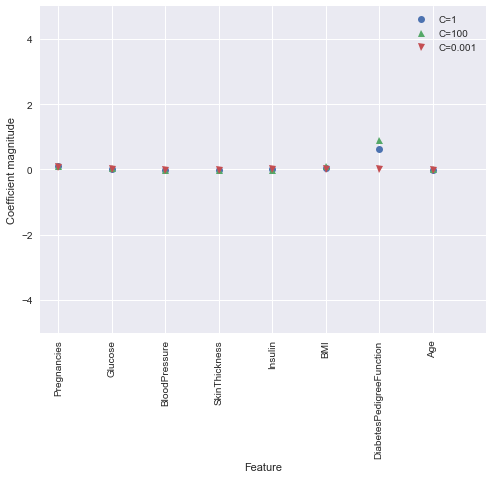

In [40]:
#作图比较C调整的影响
#enumerate()遍历
diabetes_features=[x for i,x in enumerate(diabetes.columns)if i!=8]

plt.figure(figsize=(8,6))
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg_001.coef_.T,'v',label="C=0.001")
#rotation 旋转角度
plt.xticks(range(diabetes.shape[1]),diabetes_features,rotation=90)
plt.ylim(-5,5)
plt.xlabel('Feature')
plt.ylabel('Coefficient magnitude')
plt.legend()
plt.savefig('log_coef')
plt.show()

In [43]:
##决策树 Decision Tree##

from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

print('Accuracy of DecisionTree classifier on training set:{:.3f}'.format(tree.score(X_train,y_train)))
print('Accuracy of DecisionTree classifier on test set:{:.3f}'.format(tree.score(X_test,y_test)))

Accuracy of DecisionTree classifier on training set:1.000
Accuracy of DecisionTree classifier on test set:0.714


In [44]:
#训练集准确度很高，测试集准确度低很多，过拟合overfitting
#参数调整：限制树深度（剪枝）adjustment(pruning)
tree=DecisionTreeClassifier(max_depth=3,random_state=0)
tree.fit(X_train,y_train)

print('Accuracy of DecisionTree classifier(max_depth=3) on training set:{:.3f}'.format(tree.score(X_train,y_train)))
print('Accuracy of DecisionTree classifier(max_depth=3) on test set:{:.3f}'.format(tree.score(X_test,y_test)))


Accuracy of DecisionTree classifier(max_depth=3) on training set:0.773
Accuracy of DecisionTree classifier(max_depth=3) on test set:0.740


Feature importance:
[ 0.04554275  0.6830362   0.          0.          0.          0.27142106
  0.          0.        ]


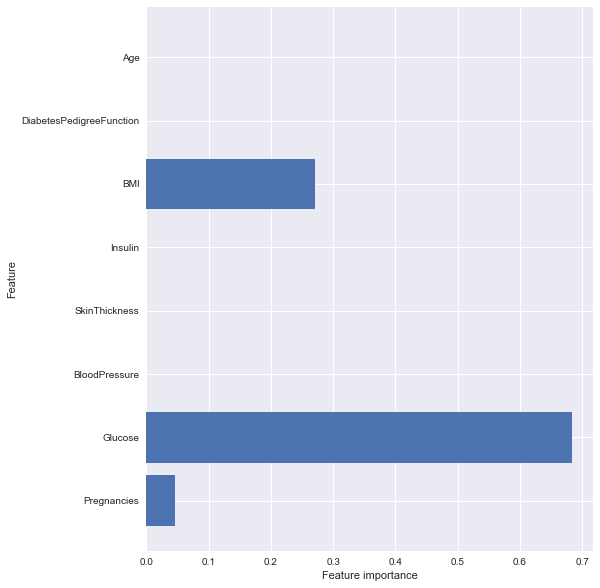

In [80]:
#特征重要度feature importance
print("Feature importance:\n{}".format(tree.feature_importances_))

#可视化重要度参数
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,10))
    n_features=8
    
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),diabetes_features)
    plt.ylabel("Feature")
    plt.xlabel("Feature importance")

plot_feature_importances_diabetes(tree)    
plt.savefig('feature_importance')
plt.show()

In [70]:
##随机森林 Random forest##
#树的数量：100
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(X_train,y_train)

print('Accuracy of RandomForest classifier on training set:{:.3f}'.format(rf.score(X_train,y_train)))
print('Accuracy of RandomForest classifier on test set:{:.3f}'.format(rf.score(X_test,y_test)))


Accuracy of RandomForest classifier on training set:1.000
Accuracy of RandomForest classifier on test set:0.786


In [77]:
#参数调整测试
rf1=RandomForestClassifier(max_depth=3,n_estimators=100,random_state=0)
rf1.fit(X_train,y_train)
print('Accuracy of RandomForest classifier(max_depth=3) on training set:{:.3f}'.format(rf1.score(X_train,y_train)))
print('Accuracy of RandomForest classifier(max_depth=3) on test set:{:.3f}'.format(rf1.score(X_test,y_test)))

rf2=RandomForestClassifier(max_depth=3,n_estimators=80,random_state=0)
rf2.fit(X_train,y_train)
print('Accuracy of RandomForest classifier(n_estimators=80) on training set:{:.3f}'.format(rf2.score(X_train,y_train)))
print('Accuracy of RandomForest classifier(n_estimators=80) on test set:{:.3f}'.format(rf2.score(X_test,y_test)))

Accuracy of RandomForest classifier(max_depth=3) on training set:0.800
Accuracy of RandomForest classifier(max_depth=3) on test set:0.755
Accuracy of RandomForest classifier(n_estimators=80) on training set:0.795
Accuracy of RandomForest classifier(n_estimators=80) on test set:0.760


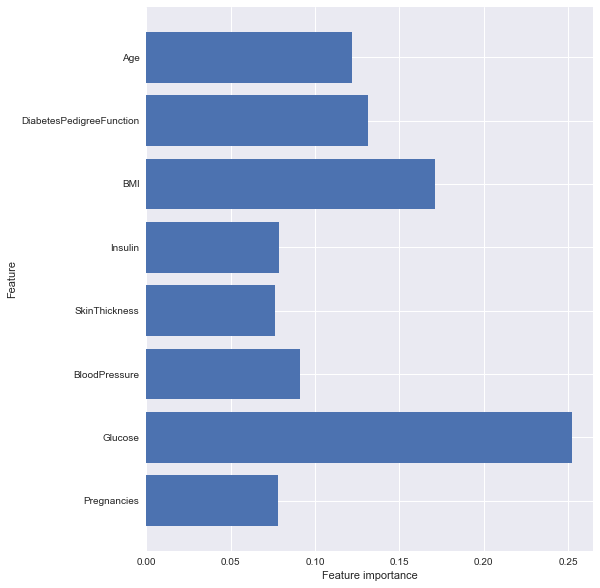

In [83]:
#对精确度性能没有提升 则不必修改此参数

#特征重要度参数
plot_feature_importances_diabetes(rf)    
plt.savefig('feature_importance')
plt.show()

In [84]:
##梯度提升##

from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(random_state=0)
gb.fit(X_train,y_train)

print('Accuracy of GradientBoosting classifier on training set:{:.3f}'.format(gb.score(X_train,y_train)))
print('Accuracy of GradientBoosting classifier on test set:{:.3f}'.format(gb.score(X_test,y_test)))

Accuracy of GradientBoosting classifier on training set:0.917
Accuracy of GradientBoosting classifier on test set:0.792


In [85]:
#过拟合 overfitting

#参数修改：1.限制最大深度 2.降低学习速率
#限制深度
gb1=GradientBoostingClassifier(random_state=0,max_depth=1)
gb1.fit(X_train,y_train)

print('Accuracy of GradientBoosting classifier(max_depth=1) on training set:{:.3f}'.format(gb1.score(X_train,y_train)))
print('Accuracy of GradientBoosting classifier(max_depth=1) on test set:{:.3f}'.format(gb1.score(X_test,y_test)))

#降低速率
gb2=GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gb2.fit(X_train,y_train)

print('Accuracy of GradientBoosting classifier(learning_rate=0.01) on training set:{:.3f}'.format(gb2.score(X_train,y_train)))
print('Accuracy of GradientBoosting classifier(learning_rate=0.01) on test set:{:.3f}'.format(gb2.score(X_test,y_test)))


Accuracy of GradientBoosting classifier(max_depth=1) on training set:0.804
Accuracy of GradientBoosting classifier(max_depth=1) on test set:0.781
Accuracy of GradientBoosting classifier(learning_rate=0.01) on training set:0.802
Accuracy of GradientBoosting classifier(learning_rate=0.01) on test set:0.776


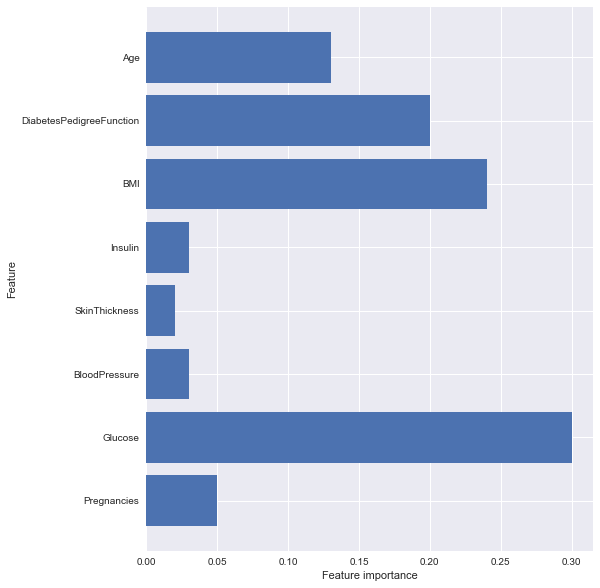

In [86]:
#预测性能没有提升
#特征重要度参数
plot_feature_importances_diabetes(gb1)    
plt.savefig('feature_importance')
plt.show()

In [89]:
##支持向量机 SVM##

from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

print('Accuracy of SVM classifier on training set:{:.3f}'.format(svc.score(X_train,y_train)))
print('Accuracy of SVM classifier on test set:{:.3f}'.format(svc.score(X_test,y_test)))

Accuracy of SVM classifier on training set:1.000
Accuracy of SVM classifier on test set:0.651


In [95]:
#过拟合 overfitting
#参数调整
#1.SVM需要调整各特征值尺度使其基本上在同一量表上 度量标准化
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

svc=SVC()
svc.fit(X_train_scaled,y_train)

print('Accuracy of SVM classifier(scaled) on training set:{:.3f}'.format(svc.score(X_train_scaled,y_train)))
print('Accuracy of SVM classifier(scaled) on test set:{:.3f}'.format(svc.score(X_test_scaled,y_test)))

Accuracy of SVM classifier(scaled) on training set:0.769
Accuracy of SVM classifier(scaled) on test set:0.771


In [92]:
#2.提高C 或者 gamma
svc=SVC(C=1000)

svc.fit(X_train_scaled,y_train)

print('Accuracy of SVM classifier(C=1000) on training set:{:.3f}'.format(svc.score(X_train_scaled,y_train)))
print('Accuracy of SVM classifier(C=1000) on test set:{:.3f}'.format(svc.score(X_test_scaled,y_test)))

Accuracy of SVM classifier(C=1000) on training set:0.790
Accuracy of SVM classifier(C=1000) on test set:0.797


In [94]:
##神经网络 深度学习 neural networks

from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)

print('Accuracy of MLPC classifier on training set:{:.3f}'.format(mlp.score(X_train,y_train)))
print('Accuracy of MLPC classifier on test set:{:.3f}'.format(mlp.score(X_test,y_test)))

Accuracy of MLPC classifier on training set:0.710
Accuracy of MLPC classifier on test set:0.672


In [98]:
#underfitting
#参数调整
#1.标准化数据
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled2=scaler.fit_transform(X_train)
X_test_scaled2=scaler.fit_transform(X_test)

mlp=MLPClassifier(random_state=0)
mlp.fit(X_train_scaled2,y_train)

print('Accuracy of MLPC classifier(scaled) on training set:{:.3f}'.format(mlp.score(X_train_scaled2,y_train)))
print('Accuracy of MLPC classifier(scaled) on test set:{:.3f}'.format(mlp.score(X_test_scaled2,y_test)))

Accuracy of MLPC classifier(scaled) on training set:0.823
Accuracy of MLPC classifier(scaled) on test set:0.802


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [99]:
#2.增加迭代次数
mlp=MLPClassifier(max_iter=1000,random_state=0)
mlp.fit(X_train_scaled2,y_train)

print('Accuracy of MLPC classifier(max_iter=1000) on training set:{:.3f}'.format(mlp.score(X_train_scaled2,y_train)))
print('Accuracy of MLPC classifier(max_iter=1000) on test set:{:.3f}'.format(mlp.score(X_test_scaled2,y_test)))

Accuracy of MLPC classifier(max_iter=1000) on training set:0.877
Accuracy of MLPC classifier(max_iter=1000) on test set:0.755


In [100]:
#对测试集无效果
#3.调高alpha参数 加强权重正则化
mlp=MLPClassifier(max_iter=1000,alpha=1,random_state=0)
mlp.fit(X_train_scaled2,y_train)

print('Accuracy of MLPC classifier(alpha=1) on training set:{:.3f}'.format(mlp.score(X_train_scaled2,y_train)))
print('Accuracy of MLPC classifier(alpha=1) on test set:{:.3f}'.format(mlp.score(X_test_scaled2,y_test)))

Accuracy of MLPC classifier(alpha=1) on training set:0.795
Accuracy of MLPC classifier(alpha=1) on test set:0.792


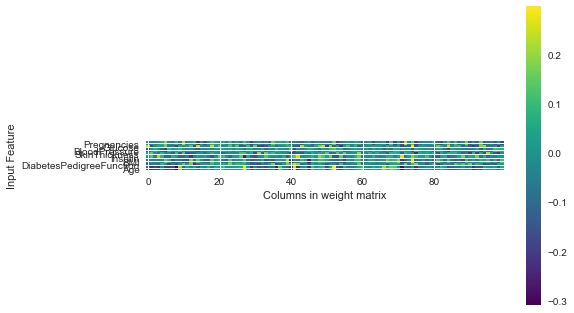

In [104]:
#可视化神经网络权重热图
#第一层 layer1
    
plt.imshow(mlp.coefs_[0],interpolation='none',cmap='viridis')
plt.yticks(range(8),diabetes_features)
plt.ylabel("Input Feature")
plt.xlabel("Columns in weight matrix")
plt.colorbar()
plt.show()